In [ ]:
import pandas as pd
import pickle
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

First I start by importing the dataset and converting it into a dataframe.

In [ ]:
unpickled_df = pd.read_pickle("/content/hw1_p2.pkl")
df = pd.DataFrame.from_dict(unpickled_df)

In [ ]:
df.dtypes

,0
train,object
test,object


In [ ]:
df

,train,test
x1,"[1792, 2192, 900, 630, 1188, 2161, 2374, 1200,...","[693, 864, 1276, 1131, 1077, 520, 720, 1092, 1..."
x2,"[2001, 1939, 1967, 1970, 1959, 2007, 2003, 200...","[1941, 1914, 1958, 1941, 1920, 1927, 1949, 197..."
y,"[231500, 179500, 122000, 84500, 142000, 325624...",NaN
ytest,NaN,"[52500, 58500, 60000, 66500, 67000, 68500, 725..."


Now I'm extrating each attribute from the corresponding train/test sections.

In [ ]:
x1_train = df.loc["x1", "train"]
x2_train = df.loc["x2", "train"]
y_train  = df.loc["y", "train"]

x1_test = df.loc["x1", "test"]
x2_test = df.loc["x2", "test"]
y_test  = df.loc["ytest", "test"]

1. Fit linear regression models to x1, x2, and (x1,x2), and report your testing error for each

First with only x1

In [ ]:
X_train = np.column_stack([np.ones(500), x1_train])
X_test= np.column_stack([np.ones(500), x1_test])

In [ ]:
w = np.linalg.inv(X_train.T @ X_train) @ (X_train.T @ y_train)
w

array([-1979.06173446,   121.06577892])

In [ ]:
y_pred = X_test @ w

In [ ]:
error = np.sqrt(np.mean((y_pred - y_test) ** 2))
error

np.float64(53007.39245127851)

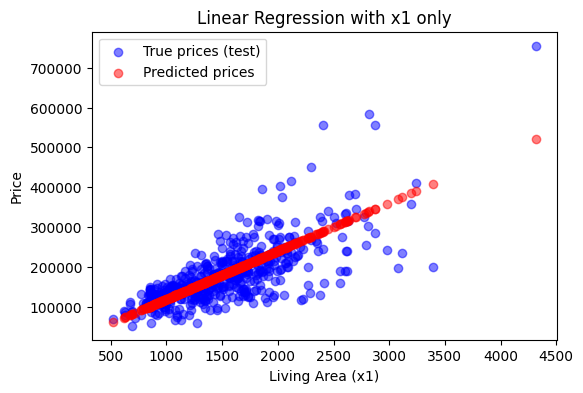

In [ ]:
plt.figure(figsize=(6,4))
plt.scatter(x1_test, y_test, color="blue", alpha=0.5, label="True prices (test)")
plt.scatter(x1_test, y_pred, color="red", alpha=0.5, label="Predicted prices")

plt.xlabel("Living Area (x1)")
plt.ylabel("Price")
plt.title("Linear Regression with x1 only")
plt.legend()
plt.show()

Now with only x2


In [ ]:
X_train = np.column_stack([np.ones(500), x2_train])
X_test= np.column_stack([np.ones(500), x2_test])

In [ ]:
w = np.linalg.inv(X_train.T @ X_train) @ (X_train.T @ y_train)
w

array([-2.96975102e+06,  1.59772099e+03])

In [ ]:
y_pred = X_test @ w

In [ ]:
error = np.sqrt(np.mean((y_pred - y_test) ** 2))
error

np.float64(67402.18200423525)

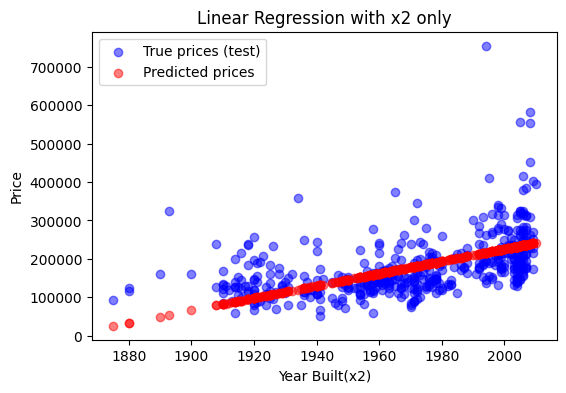

In [ ]:
plt.figure(figsize=(6,4))
plt.scatter(x2_test, y_test, color="blue", alpha=0.5, label="True prices (test)")
plt.scatter(x2_test, y_pred, color="red", alpha=0.5, label="Predicted prices")

plt.xlabel("Year Built(x2)")
plt.ylabel("Price")
plt.title("Linear Regression with x2 only")
plt.legend()
plt.show()

Now with both x1 and x2

In [ ]:
X_train = np.column_stack([np.ones(500), x1_train, x2_train])
X_test= np.column_stack([np.ones(500), x1_test, x2_test])

In [ ]:
w = np.linalg.inv(X_train.T @ X_train) @ (X_train.T @ y_train)
w

array([-2.30432351e+06,  1.04798961e+02,  1.18033043e+03])

In [ ]:
y_pred = X_test @ w

In [ ]:
error = np.sqrt(np.mean((y_pred - y_test) ** 2))
error

np.float64(43871.68172706813)

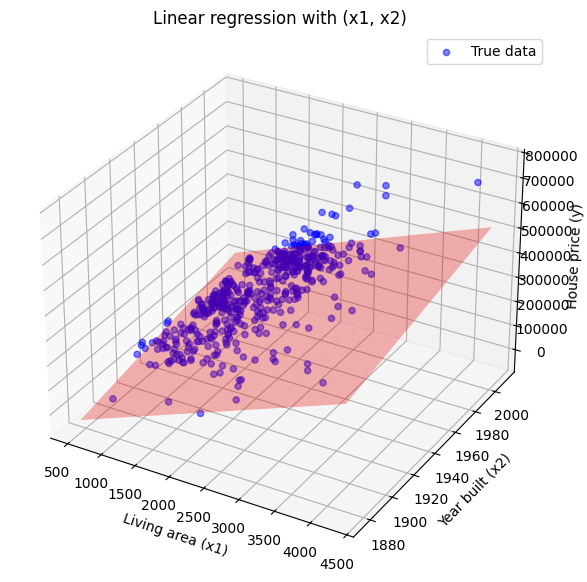

In [ ]:
w0, w1, w2 = w

fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection="3d")

ax.scatter(x1_test, x2_test, y_test, c="blue", alpha=0.5, label="True data")

x1_grid, x2_grid = np.meshgrid(
    np.linspace(x1_test.min(), x1_test.max(), 30),
    np.linspace(x2_test.min(), x2_test.max(), 30)
)
y_grid = w0 + w1*x1_grid + w2*x2_grid

ax.plot_surface(x1_grid, x2_grid, y_grid, alpha=0.3, color="red")

ax.set_xlabel("Living area (x1)")
ax.set_ylabel("Year built (x2)")
ax.set_zlabel("House price (y)")
ax.set_title("Linear regression with (x1, x2)")
ax.legend()
plt.show()

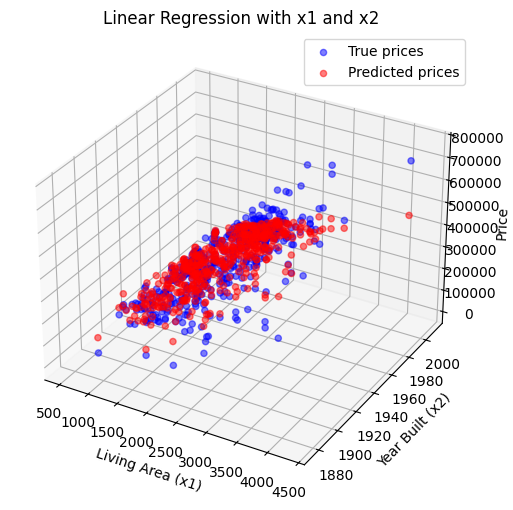

In [ ]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x1_test, x2_test, y_test, color="blue", alpha=0.5, label="True prices")
ax.scatter(x1_test, x2_test, y_pred, color="red", alpha=0.5, label="Predicted prices")

x1_grid, x2_grid = np.meshgrid(
    np.linspace(x1_test.min(), x1_test.max(), 30),
    np.linspace(x2_test.min(), x2_test.max(), 30)
)
y_grid = w[0] + w[1]*x1_grid + w[2]*x2_grid

ax.set_xlabel("Living Area (x1)")
ax.set_ylabel("Year Built (x2)")
ax.set_zlabel("Price")
ax.set_title("Linear Regression with x1 and x2")
ax.legend()
plt.show()

2. Repeat the above experiment, but this time use φ(x) = [1,x1,x2,x2
1,x2
2,x1x2] as your basis.
In this case your model is:
y= c0 + c1x1 + c2x2 + c3x2
1 + c4x2
2 + c5x1x2. (3)
What type of regression are we solving here? How does it perform compared to the linear
regression? (Compare the test errors) [4pt]

In [ ]:
X_train = np.column_stack([np.ones(500), x1_train, x2_train, x1_train**2, x2_train**2, x1_train*x2_train])
X_test = np.column_stack([np.ones(500), x1_test, x2_test, x1_test**2, x2_test**2, x1_test*x2_test])

In [ ]:
w = np.linalg.solve(X_train.T @ X_train, X_train.T @ y_train)
w

array([ 3.87209848e+07, -1.62587968e+03, -3.93137906e+04,  2.33239039e-02,
        1.00011947e+01,  8.32387222e-01])

In [ ]:
y_pred = X_test @ w

In [ ]:
error = np.sqrt(np.mean((y_pred - y_test) ** 2))
error

np.float64(39013.009070894484)

3. Write down the ridge regression solution to this problem. Using (x1,x2), solve the ridge
regression for the following ridge regularization coefficients λ= {1e−5,1e−4,1e−3,1e−
2,1e−1}. Plot the test error as a function of λ and describe your conclusion. [8pt]

In [ ]:
X_train = np.column_stack([np.ones(500), x1_train, x2_train])
X_test= np.column_stack([np.ones(500), x1_test, x2_train])

In [ ]:
lambdas = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1]
errors = []

In [ ]:
for lam in lambdas:
    n_features = X_train.shape[1]
    I = np.eye(n_features)

    w_ridge = np.linalg.inv(X_train.T @ X_train + lam * I) @ (X_train.T @ y_train)

    y_pred = X_test @ w_ridge

    error = np.sqrt(np.mean((y_test - y_pred) ** 2))
    errors.append(error)
    print(f"Lambda={lam}, Error={error}")


Lambda=1e-05, Error=60833.94334378792
Lambda=0.0001, Error=60819.42801531771
Lambda=0.001, Error=60676.100411638225
Lambda=0.01, Error=59407.388291570685
Lambda=0.1, Error=54314.087376876516


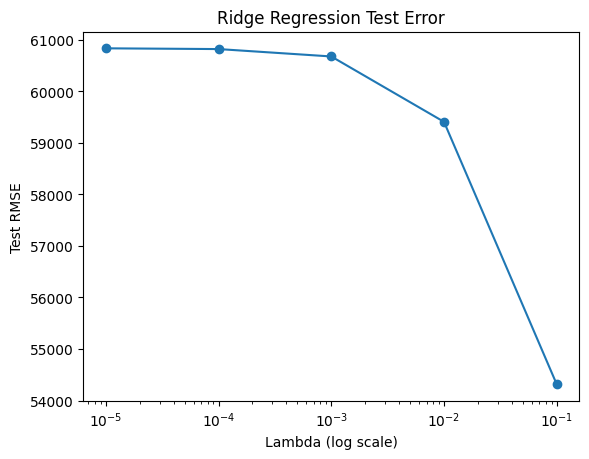

In [ ]:
plt.plot(lambdas, errors, marker="o")
plt.xscale("log")
plt.xlabel("Lambda (log scale)")
plt.ylabel("Test RMSE")
plt.title("Ridge Regression Test Error")
plt.show()